 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [50]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import csv
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [51]:
# Reading whale returns

whale_returns_csv = Path("./Resources/whale_returns.csv")
whale_returns_df = pd.read_csv(whale_returns_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
whale_returns_df.sort_index(inplace=True)
whale_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [52]:
# Count nulls
# YOUR CODE HERE
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [53]:
# Drop nulls
# YOUR CODE HERE
whale_returns_df=whale_returns_df.dropna()

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [54]:
# Reading algorithmic returns
algo_returns_csv = Path("./Resources/algo_returns.csv")
# YOUR CODE HERE
algo_returns_df = pd.read_csv(algo_returns_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
algo_returns_df.sort_index(inplace=True)
algo_returns_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [55]:
# Count nulls
# YOUR CODE HERE
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [56]:
# Drop nulls
# YOUR CODE HERE
algo_returns_df=algo_returns_df.dropna()


## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [57]:
# Reading S&P 500 Closing Prices, sorting index
sp500_history_csv = Path("./Resources/sp500_history.csv")
# YOUR CODE HERE
sp500_history_df = pd.read_csv(sp500_history_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
sp500_history_df.sort_index(inplace=True)
sp500_history_df.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [58]:
# Count nulls
# YOUR CODE HERE
sp500_history_df.isnull().sum()

Close    0
dtype: int64

In [59]:
# Check Data Types
# YOUR CODE HERE
sp500_history_df.dtypes

Close    object
dtype: object

In [60]:
# Fix Data Types
# YOUR CODE HERE

sp500_history_df["Close"]=sp500_history_df.Close.str.replace("$", "")


In [61]:
# Convert data type

sp500_history_df["Close"] =sp500_history_df["Close"].astype('float')
sp500_history_df = sp500_history_df["Close"]

In [62]:
# Calculate Daily Returns
# YOUR CODE HERE
sp500_returns = sp500_history_df.pct_change().dropna()

In [63]:
# Drop nulls
# YOUR CODE HERE
sp500_returns.isna().sum()

0

In [64]:
# Rename Column
# YOUR CODE HERE
sp500_history_df=sp500_returns.rename("S&P 500")
sp500_history_df.head()

Date
2012-10-02    0.000872
2012-10-03    0.003624
2012-10-04    0.007174
2012-10-05   -0.000322
2012-10-08   -0.003457
Name: S&P 500, dtype: float64

In [65]:
## Combine Whale, Algorithmic, and S&P 500 Returns
sp500_returns_df = sp500_history_df.to_frame()
sp500_returns_df.head()

,S&P 500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [66]:
# Concatenate all DataFrames into a single DataFrame
# YOUR CODE HERE

all_returns=pd.concat([whale_returns_df,algo_returns_df,sp500_returns_df], axis='columns', join='inner')
all_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. 

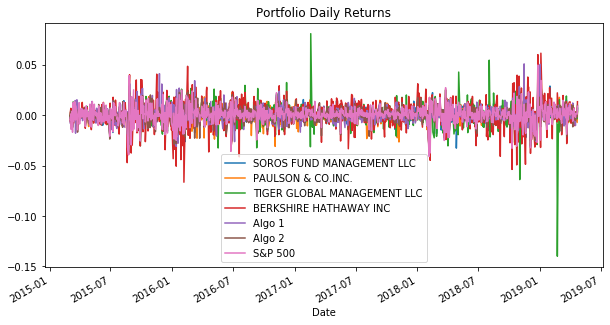

In [67]:
# Plot daily returns
# YOUR CODE HERE
all_returns.plot(figsize = (10, 5), title = "Portfolio Daily Returns")

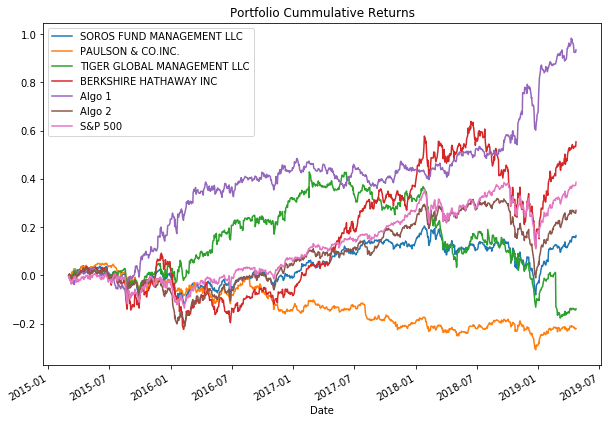

In [68]:
# Plot cumulative returns
# YOUR CODE HERE
cumulative_returns = ((all_returns+1).cumprod()-1)
cumulative_returns.plot(figsize =(10,7),title="Portfolio Cummulative Returns")

1. Algo 2 outperforms the S&P 500

---

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

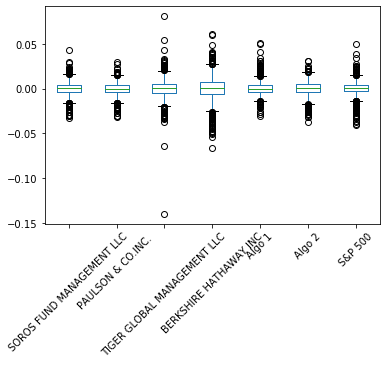

In [69]:
# Box plot to visually show risk
# YOUR CODE HERE

all_returns.boxplot(grid=False, rot=45)

1. Tiger Global Management LLC has largest spread; Algo 2 has the smallest spread

In [70]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. Which portfolios are riskier than the S&P 500?
# YOUR CODE HERE

all_returns_std=all_returns.std()
print(all_returns_std)

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
S&P 500                        0.008554
dtype: float64


2. Tiger Global Management LLC and Berkshire portfolios are riskier


In [71]:
# Determine which portfolios are riskier than the S&P 500
# YOUR CODE HERE

for std in all_returns_std:
    if std > sp500_returns:
       
        print(f"This portfolio is risky:{std}")
    
else:
    if std< sp500_returns:
        
        print(f"This portfolio is safer than the s&P 500")


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [72]:
# Calculate the annualized standard deviation (252 trading days)
# YOUR CODE HERE

trading_days = 252
sqrt_trading_days = trading_days ** 2
all_annual_std = all_returns_std * sqrt_trading_days

print (all_annual_std)

SOROS FUND MANAGEMENT LLC      501.387695
PAULSON & CO.INC.              445.993610
TIGER GLOBAL MANAGEMENT LLC    691.810647
BERKSHIRE HATHAWAY INC         820.383946
Algo 1                         483.913306
Algo 2                         529.767806
S&P 500                        543.196171
dtype: float64


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
2. Calculate and plot a 60 day Beta for Berkshire Hathaway Inc compared to the S&&P 500

In [73]:
# Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window
# YOUR CODE HERE

pd.rolling_std((all_returns_std["S&P 500"]), 21)

AttributeError: module 'pandas' has no attribute 'rolling_std'

In [74]:
# Correlation
# YOUR CODE HERE

all_returns.corr()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
S&P 500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


2. ALGORITHM 2 MOST CLOSELY MIMICS THE S&P 500

In [75]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
# YOUR CODE HERE

#first step is to calculate covariance of all daily returns of Algo 2 and S&P 500
covariance = all_returns["Algo 2"].cov(all_returns["S&P 500"])
print(covariance)

6.127932374145016e-05


In [76]:
#calculate variance of all daily returns of Algo 2 vs S&P 500
variance = all_returns["S&P 500"].var()
print(variance)

7.316632424648712e-05


In [77]:
#calculate Beta of all daily returns of Algo 2
algo_2_beta = covariance / variance
print(algo_2_beta)

0.8375345402757788


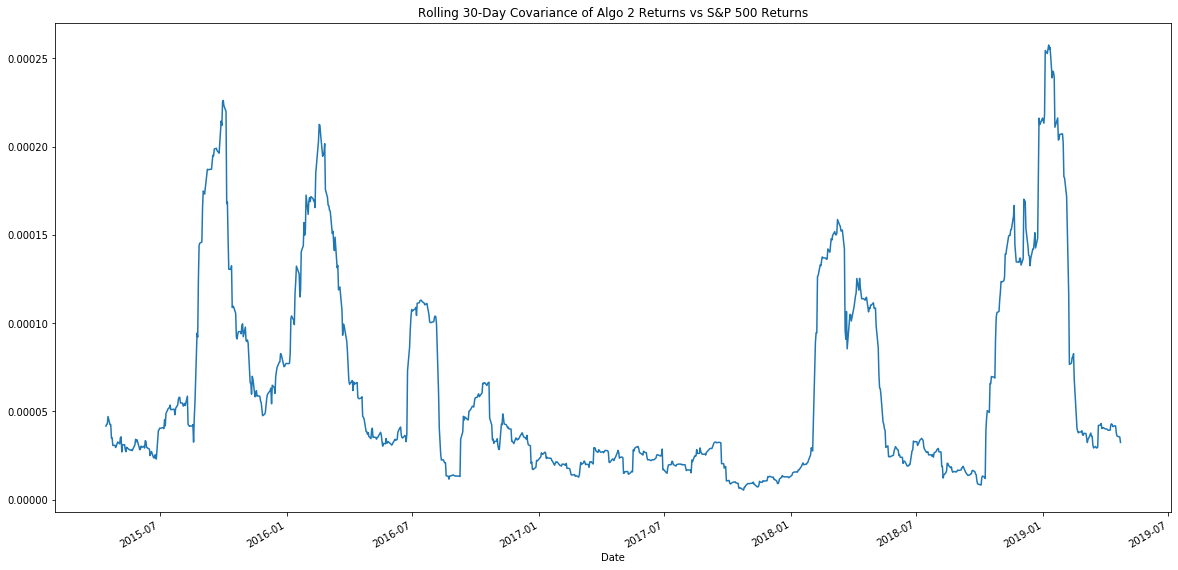

In [78]:
#calculate 30-day rolling covariance of Algo 2 vs S&P 500 Returns and plot data

rolling_covariance = all_returns["Algo 2"].rolling(window=30).cov(all_returns["S&P 500"])
rolling_covariance.plot(figsize=(20, 10), title = "Rolling 30-Day Covariance of Algo 2 Returns vs S&P 500 Returns")

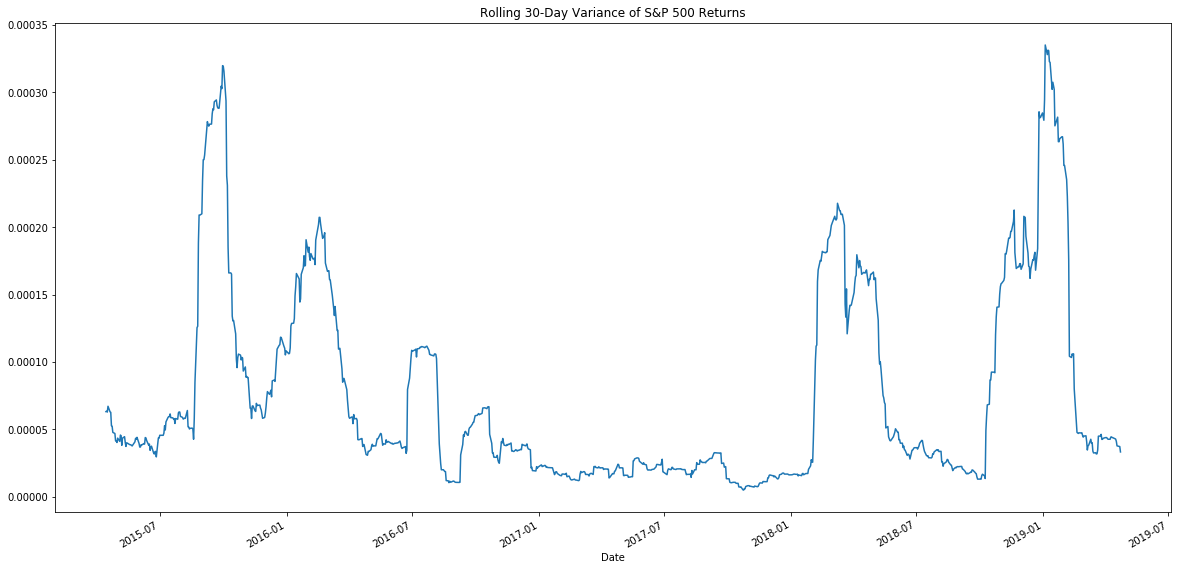

In [79]:
#calculate 30-day rolling variance of s&p 500 Returns
rolling_variance = all_returns["S&P 500"].rolling(window=30).var()
rolling_variance.plot(figsize=(20,10), title = "Rolling 30-Day Variance of S&P 500 Returns")

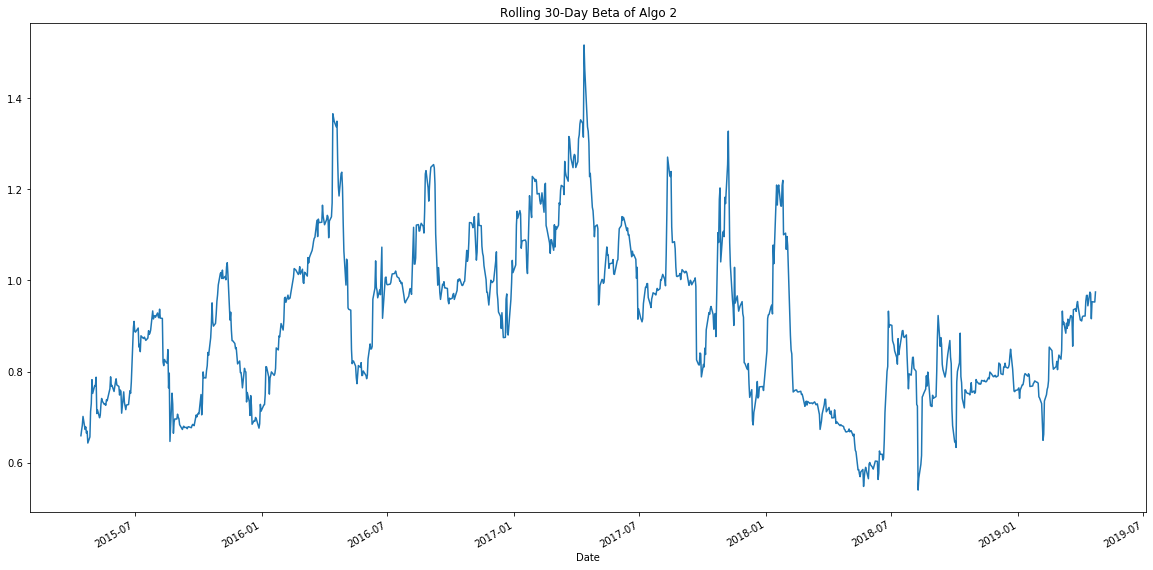

In [80]:
#calculate 30-Day Rolling Beta of Algo 2
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(20,10), title = "Rolling 30-Day Beta of Algo 2")

### Challenge: Exponentially Weighted Average 

An alternative way to calculate a rollwing window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the `ewm` with a 21 day half-life.

In [81]:
# (OPTIONAL) YOUR CODE HERE

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

Calculate and plot the annualized Sharpe ratios for all portfolios to determine which portfolio has the best performance

In [82]:
# Annualzied Sharpe Ratios
# YOUR CODE HERE

#first calculate sharpe ratios

annual_sharpe_ratios = (all_returns.mean() * 252) / (all_returns.std() * np.sqrt(252))
print(annual_sharpe_ratios)

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
S&P 500                        0.648267
dtype: float64


 plot() these sharpe ratios using a barplot.
 On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales?

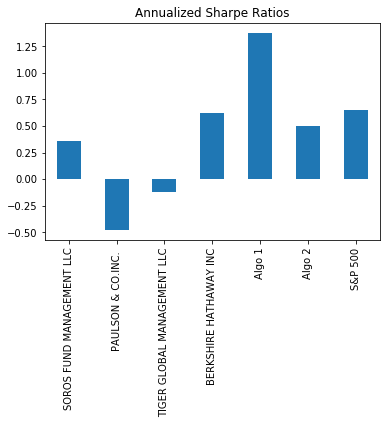

In [83]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE

#it looks like the algorithmic strategies outperform the market and whales portfolios

annual_sharpe_ratios.plot(kind="bar", title = "Annualized Sharpe Ratios")

---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [84]:
# Read the first stock
# YOUR CODE HERE

# Read nike csv

nike_data_csv = Path("./Resources/nike_data - Sheet1.csv")
nike_returns_df = pd.read_csv(nike_data_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
nike_returns_df.sort_index(ascending=True, inplace=True)
nike_returns_df = (nike_returns_df.rename(columns={'Close' : 'Nike Returns'}))
nike_returns = nike_returns_df.pct_change()
nike_returns_df = nike_returns
print(nike_returns_df)



                     Nike Returns
Date                             
2019-04-01 16:00:00           NaN
2019-04-02 16:00:00     -0.010090
2019-04-03 16:00:00      0.001185
2019-04-04 16:00:00      0.009589
2019-04-05 16:00:00      0.001407
...                           ...
2020-03-30 16:00:00      0.025832
2020-03-31 16:00:00     -0.030921
2020-04-01 16:00:00     -0.042422
2020-04-02 16:00:00      0.011486
2020-04-03 16:00:00     -0.015972

[256 rows x 1 columns]


In [85]:
# Read the second stock
# YOUR CODE HERE

target_data_csv = Path("./Resources/target_data - Sheet1.csv")
target_returns_df = pd.read_csv(target_data_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
target_returns_df.sort_index(ascending=True, inplace=True)
target_returns_df = (target_returns_df.rename(columns={'Close' : 'Target Returns'}))
target_returns = target_returns_df.pct_change()
target_returns_df = target_returns
print(target_returns_df)

                     Target Returns
Date                               
2019-04-01 16:00:00             NaN
2019-04-02 16:00:00       -0.006377
2019-04-03 16:00:00       -0.001888
2019-04-04 16:00:00        0.026100
2019-04-05 16:00:00       -0.005407
...                             ...
2020-03-30 16:00:00        0.013405
2020-03-31 16:00:00       -0.031663
2020-04-01 16:00:00        0.024739
2020-04-02 16:00:00       -0.009552
2020-04-03 16:00:00       -0.018970

[256 rows x 1 columns]


In [86]:
# Read the third stock
# YOUR CODE HERE

disney_data_csv = Path("./Resources/disney_data - Sheet1.csv")
disney_returns_df = pd.read_csv(disney_data_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
disney_returns_df.sort_index(ascending=True, inplace=True)
disney_returns_df = (disney_returns_df.rename(columns={'Close' : 'Disney Returns'}))
disney_returns = disney_returns_df.pct_change()
disney_returns_df = disney_returns
print(disney_returns_df)

                     Disney Returns
Date                               
2019-04-01 16:00:00             NaN
2019-04-02 16:00:00       -0.004888
2019-04-03 16:00:00        0.005002
2019-04-04 16:00:00        0.019819
2019-04-05 16:00:00        0.002179
...                             ...
2020-03-30 16:00:00        0.035270
2020-03-31 16:00:00       -0.032064
2020-04-01 16:00:00       -0.017391
2020-04-02 16:00:00        0.021597
2020-04-03 16:00:00       -0.031866

[256 rows x 1 columns]


In [87]:
# Read the fourth stock
# YOUR CODE HERE

microsoft_data_csv = Path("./Resources/msft_data - Sheet1.csv")
microsoft_returns_df = pd.read_csv(microsoft_data_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
microsoft_returns_df.sort_index(ascending=True, inplace=True)
microsoft_returns_df = (microsoft_returns_df.rename(columns={'Close' : 'Microsft Returns'}))
microsoft_returns = microsoft_returns_df.pct_change()
microsoft_returns_df = microsoft_returns

print(microsoft_returns_df)


                     Microsft Returns
Date                                 
2019-04-01 16:00:00               NaN
2019-04-02 16:00:00          0.001428
2019-04-03 16:00:00          0.006544
2019-04-04 16:00:00         -0.005085
2019-04-05 16:00:00          0.004440
...                               ...
2020-03-30 16:00:00          0.070341
2020-03-31 16:00:00         -0.015727
2020-04-01 16:00:00         -0.035508
2020-04-02 16:00:00          0.020709
2020-04-03 16:00:00         -0.009210

[256 rows x 1 columns]


In [88]:
# Concatenate all stocks into a single DataFrame
# YOUR CODE HERE

my_returns_df = pd.concat([nike_returns_df,target_returns_df,disney_returns_df,microsoft_returns_df])
my_returns_df.head()

,Nike Returns,Target Returns,Disney Returns,Microsft Returns
Date,,,,
2019-04-01 16:00:00,NaN,NaN,NaN,NaN
2019-04-02 16:00:00,-0.010090,NaN,NaN,NaN
2019-04-03 16:00:00,0.001185,NaN,NaN,NaN
2019-04-04 16:00:00,0.009589,NaN,NaN,NaN
2019-04-05 16:00:00,0.001407,NaN,NaN,NaN


In [89]:
# Reset the index
# YOUR CODE HERE

my_returns_df = my_returns_df.reset_index()
print(my_returns_df)

                    Date  Nike Returns  Target Returns  Disney Returns  \
0    2019-04-01 16:00:00           NaN             NaN             NaN   
1    2019-04-02 16:00:00     -0.010090             NaN             NaN   
2    2019-04-03 16:00:00      0.001185             NaN             NaN   
3    2019-04-04 16:00:00      0.009589             NaN             NaN   
4    2019-04-05 16:00:00      0.001407             NaN             NaN   
...                  ...           ...             ...             ...   
1019 2020-03-30 16:00:00           NaN             NaN             NaN   
1020 2020-03-31 16:00:00           NaN             NaN             NaN   
1021 2020-04-01 16:00:00           NaN             NaN             NaN   
1022 2020-04-02 16:00:00           NaN             NaN             NaN   
1023 2020-04-03 16:00:00           NaN             NaN             NaN   

      Microsft Returns  
0                  NaN  
1                  NaN  
2                  NaN  
3          

In [90]:
# Drop Nulls
# YOUR CODE HERE

my_returns_df.isnull().sum()

Date                  0
Nike Returns        769
Target Returns      769
Disney Returns      769
Microsft Returns    769
dtype: int64

In [91]:
my_returns_df = my_returns_df.dropna()
my_returns_df.isnull().sum()

Date                0
Nike Returns        0
Target Returns      0
Disney Returns      0
Microsft Returns    0
dtype: int64

In [92]:
## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [93]:
# Calculate weighted portfolio returns
weights = [1/3, 1/3, 1/3]

# YOUR CODE HERE

portfolio_returns_df = my_returns_df.dot(weights)
portfolio_returns_df.head()

ValueError: Dot product shape mismatch, (0, 5) vs (3,)

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [94]:
# YOUR CODE HERE

all_returns_df = pd.concat([all_returns_df, portfolio_returns_df])
print(all_returns_df)

NameError: name 'all_returns_df' is not defined

In [95]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
# YOUR CODE HERE


## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [10]:
# Risk
# YOUR CODE HERE


In [11]:
# Rolling
# YOUR CODE HERE


In [12]:
# Beta
# YOUR CODE HERE


In [13]:
# Annualzied Sharpe Ratios
# YOUR CODE HERE


In [14]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE


## Include correlation analysis to determine which stocks (if any) are correlated

In [15]:
# YOUR CODE HERE
